In [1]:
%load_ext autoreload
%autoreload 2
%run notebook_setup.py

Working directory set to: /Users/eiriknarjord/passivbot
Python path: ['/Users/eiriknarjord/passivbot/src', '/Users/eiriknarjord/passivbot', '/Users/eiriknarjord/passivbot/notebooks', '/Users/eiriknarjord/.pyenv/versions/3.9.18/lib/python39.zip', '/Users/eiriknarjord/.pyenv/versions/3.9.18/lib/python3.9', '/Users/eiriknarjord/.pyenv/versions/3.9.18/lib/python3.9/lib-dynload', '', '/Users/eiriknarjord/passivbot/venv/lib/python3.9/site-packages']


In [2]:
import sys
import os
from backtest_forager import *

using numba
using numba
using numba


In [56]:
config = json.loads('''{
    "approved_symbols": [
        "1000BONKUSDT",
        "1000FLOKIUSDT",
        "1000PEPEUSDT",
        "1000RATSUSDT",
        "1000SATSUSDT",
        "AEVOUSDT",
        "ARKMUSDT",
        "ARUSDT",
        "AXLUSDT",
        "BAKEUSDT",
        "BIGTIMEUSDT",
        "BLURUSDT",
        "BLZUSDT",
        "BNXUSDT",
        "BOMEUSDT",
        "BONDUSDT",
        "CHRUSDT",
        "CKBUSDT",
        "CRVUSDT",
        "ENAUSDT",
        "ENSUSDT",
        "FETUSDT",
        "JASMYUSDT",
        "JUPUSDT",
        "KASUSDT",
        "LDOUSDT",
        "LEVERUSDT",
        "MAVIAUSDT",
        "MTLUSDT",
        "MYROUSDT",
        "NTRNUSDT",
        "ONDOUSDT",
        "ONGUSDT",
        "ORDIUSDT",
        "PENDLEUSDT",
        "PEOPLEUSDT",
        "PHBUSDT",
        "POLYXUSDT",
        "REZUSDT",
        "SAGAUSDT",
        "STMXUSDT",
        "TNSRUSDT",
        "TOKENUSDT",
        "TRUUSDT",
        "UNFIUSDT",
        "VANRYUSDT",
        "WIFUSDT",
        "WLDUSDT",
        "WUSDT",
        "XEMUSDT"
    ],
    "backtest": {
        "base_dir": "backtests",
        "end_date": "2024-07-02",
        "exchange": "binance",
        "start_date": "2023-05-01",
        "starting_balance": 1000000
    },
    "live": {
        "auto_gs": true,
        "execution_delay_seconds": 2.0,
        "filter_by_min_effective_cost": true,
        "forced_mode_long": "",
        "forced_mode_short": "",
        "ignored_symbols": [],
        "leverage": 10.0,
        "max_n_cancellations_per_batch": 5,
        "max_n_creations_per_batch": 3,
        "pnls_max_lookback_days": 30.0,
        "price_distance_threshold": 0.002,
        "user": "hyperliquid_01"
    },
    "long": {
        "close_grid_markup_range": 0.004248661000238185,
        "close_grid_min_markup": 0.010841443190471997,
        "close_grid_qty_pct": 0.28195434367158806,
        "close_trailing_grid_ratio": 0.0,
        "close_trailing_retracement_pct": 0.002,
        "close_trailing_threshold_pct": 0.008,
        "ema_span_0": 741.2185574700814,
        "ema_span_1": 744.8462973570812,
        "entry_grid_double_down_factor": 1.0863591641368278,
        "entry_grid_spacing_pct": 0.05,
        "entry_grid_spacing_weight": 1.9228340202257028,
        "entry_initial_ema_dist": -0.00583944422111372,
        "entry_initial_qty_pct": 0.005,
        "entry_trailing_grid_ratio": 0.0,
        "entry_trailing_retracement_pct": 0.04,
        "entry_trailing_threshold_pct": 0.01,
        "n_positions": 20,
        "total_wallet_exposure_limit": 1.999856791960373,
        "unstuck_close_pct": 0.001,
        "unstuck_ema_dist": -0.01,
        "unstuck_loss_allowance_pct": 0.02,
        "unstuck_threshold": 0.5
    },
    "minimum_market_age_days": 7.0,
    "n_ohlcvs": 100,
    "ohlcv_interval": "15m",
    "relative_volume_filter_clip_pct": 0.1,
    "short": {
        "close_grid_markup_range": 0.015894187682215406,
        "close_grid_min_markup": 0.009874445617098677,
        "close_grid_qty_pct": 0.41291243885762396,
        "close_trailing_grid_ratio": 0.0,
        "close_trailing_retracement_pct": 0.002,
        "close_trailing_threshold_pct": 0.008,
        "ema_span_0": 1047.344417430122,
        "ema_span_1": 669.671098596993,
        "entry_grid_double_down_factor": 0.10055669594382376,
        "entry_grid_spacing_pct": 0.1,
        "entry_grid_spacing_weight": 1.0675812377451999,
        "entry_initial_ema_dist": -0.059193313962995375,
        "entry_initial_qty_pct": 0.005,
        "entry_trailing_grid_ratio": 0.0,
        "entry_trailing_retracement_pct": 0.04,
        "entry_trailing_threshold_pct": 0.01,
        "n_positions": 20,
        "total_wallet_exposure_limit": 0.0,
        "unstuck_close_pct": 0.001,
        "unstuck_ema_dist": -0.01,
        "unstuck_loss_allowance_pct": 0.02,
        "unstuck_threshold": 0.5
    },
    "symbol_flags": {}
}''')

In [57]:
hlcs, mss, results_path = await prepare_hlcs_mss(config)
noisiness_indices = calc_noisiness_argsort_indices(hlcs).astype(np.int32)

1000BONKUSDT most n days of consecutive identical ohlcvs: 0.001, index last: 1619
1000FLOKIUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 185302
1000PEPEUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 186742
1000RATSUSDT most n days of consecutive identical ohlcvs: 0.001, index last: 26864
1000SATSUSDT most n days of consecutive identical ohlcvs: 0.002, index last: 1852
AEVOUSDT most n days of consecutive identical ohlcvs: 0.005, index last: 72507
ARKMUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 66607
ARUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 193492
AXLUSDT most n days of consecutive identical ohlcvs: 0.001, index last: 1773
BAKEUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 193492
BIGTIMEUSDT most n days of consecutive identical ohlcvs: 0.004, index last: 366284
BLURUSDT most n days of consecutive identical ohlcvs: 0.012, index last: 193492
BLZUSDT most n days of conse

In [58]:
fills, equities = run_backtest(hlcs, noisiness_indices, mss, config)

Starting backtest...
seconds elapsed for backtest: 1.2044


{'TP_pprice_diff_max_long': -0.01086620225036894,
 'TP_pprice_diff_max_short': 0.0,
 'TP_pprice_diff_mean_long': -0.015102191926074203,
 'TP_pprice_diff_mean_short': 0.0,
 'TP_pprice_diff_median_long': -0.015098374679213045,
 'TP_pprice_diff_median_short': 0.0,
 'TP_pprice_diff_min_long': -0.022058823529411686,
 'TP_pprice_diff_min_short': 0.0,
 'TP_pprice_diff_weighted_mean_long': -0.014356759034749709,
 'TP_pprice_diff_weighted_mean_short': 0.0,
 'adg': 0.0009357162597466239,
 'drawdown_mean': 0.004500966662037571,
 'drawdown_worst': 0.1784453817185586,
 'sharpe_ratio': 0.28426420953366677}


<AxesSubplot:>

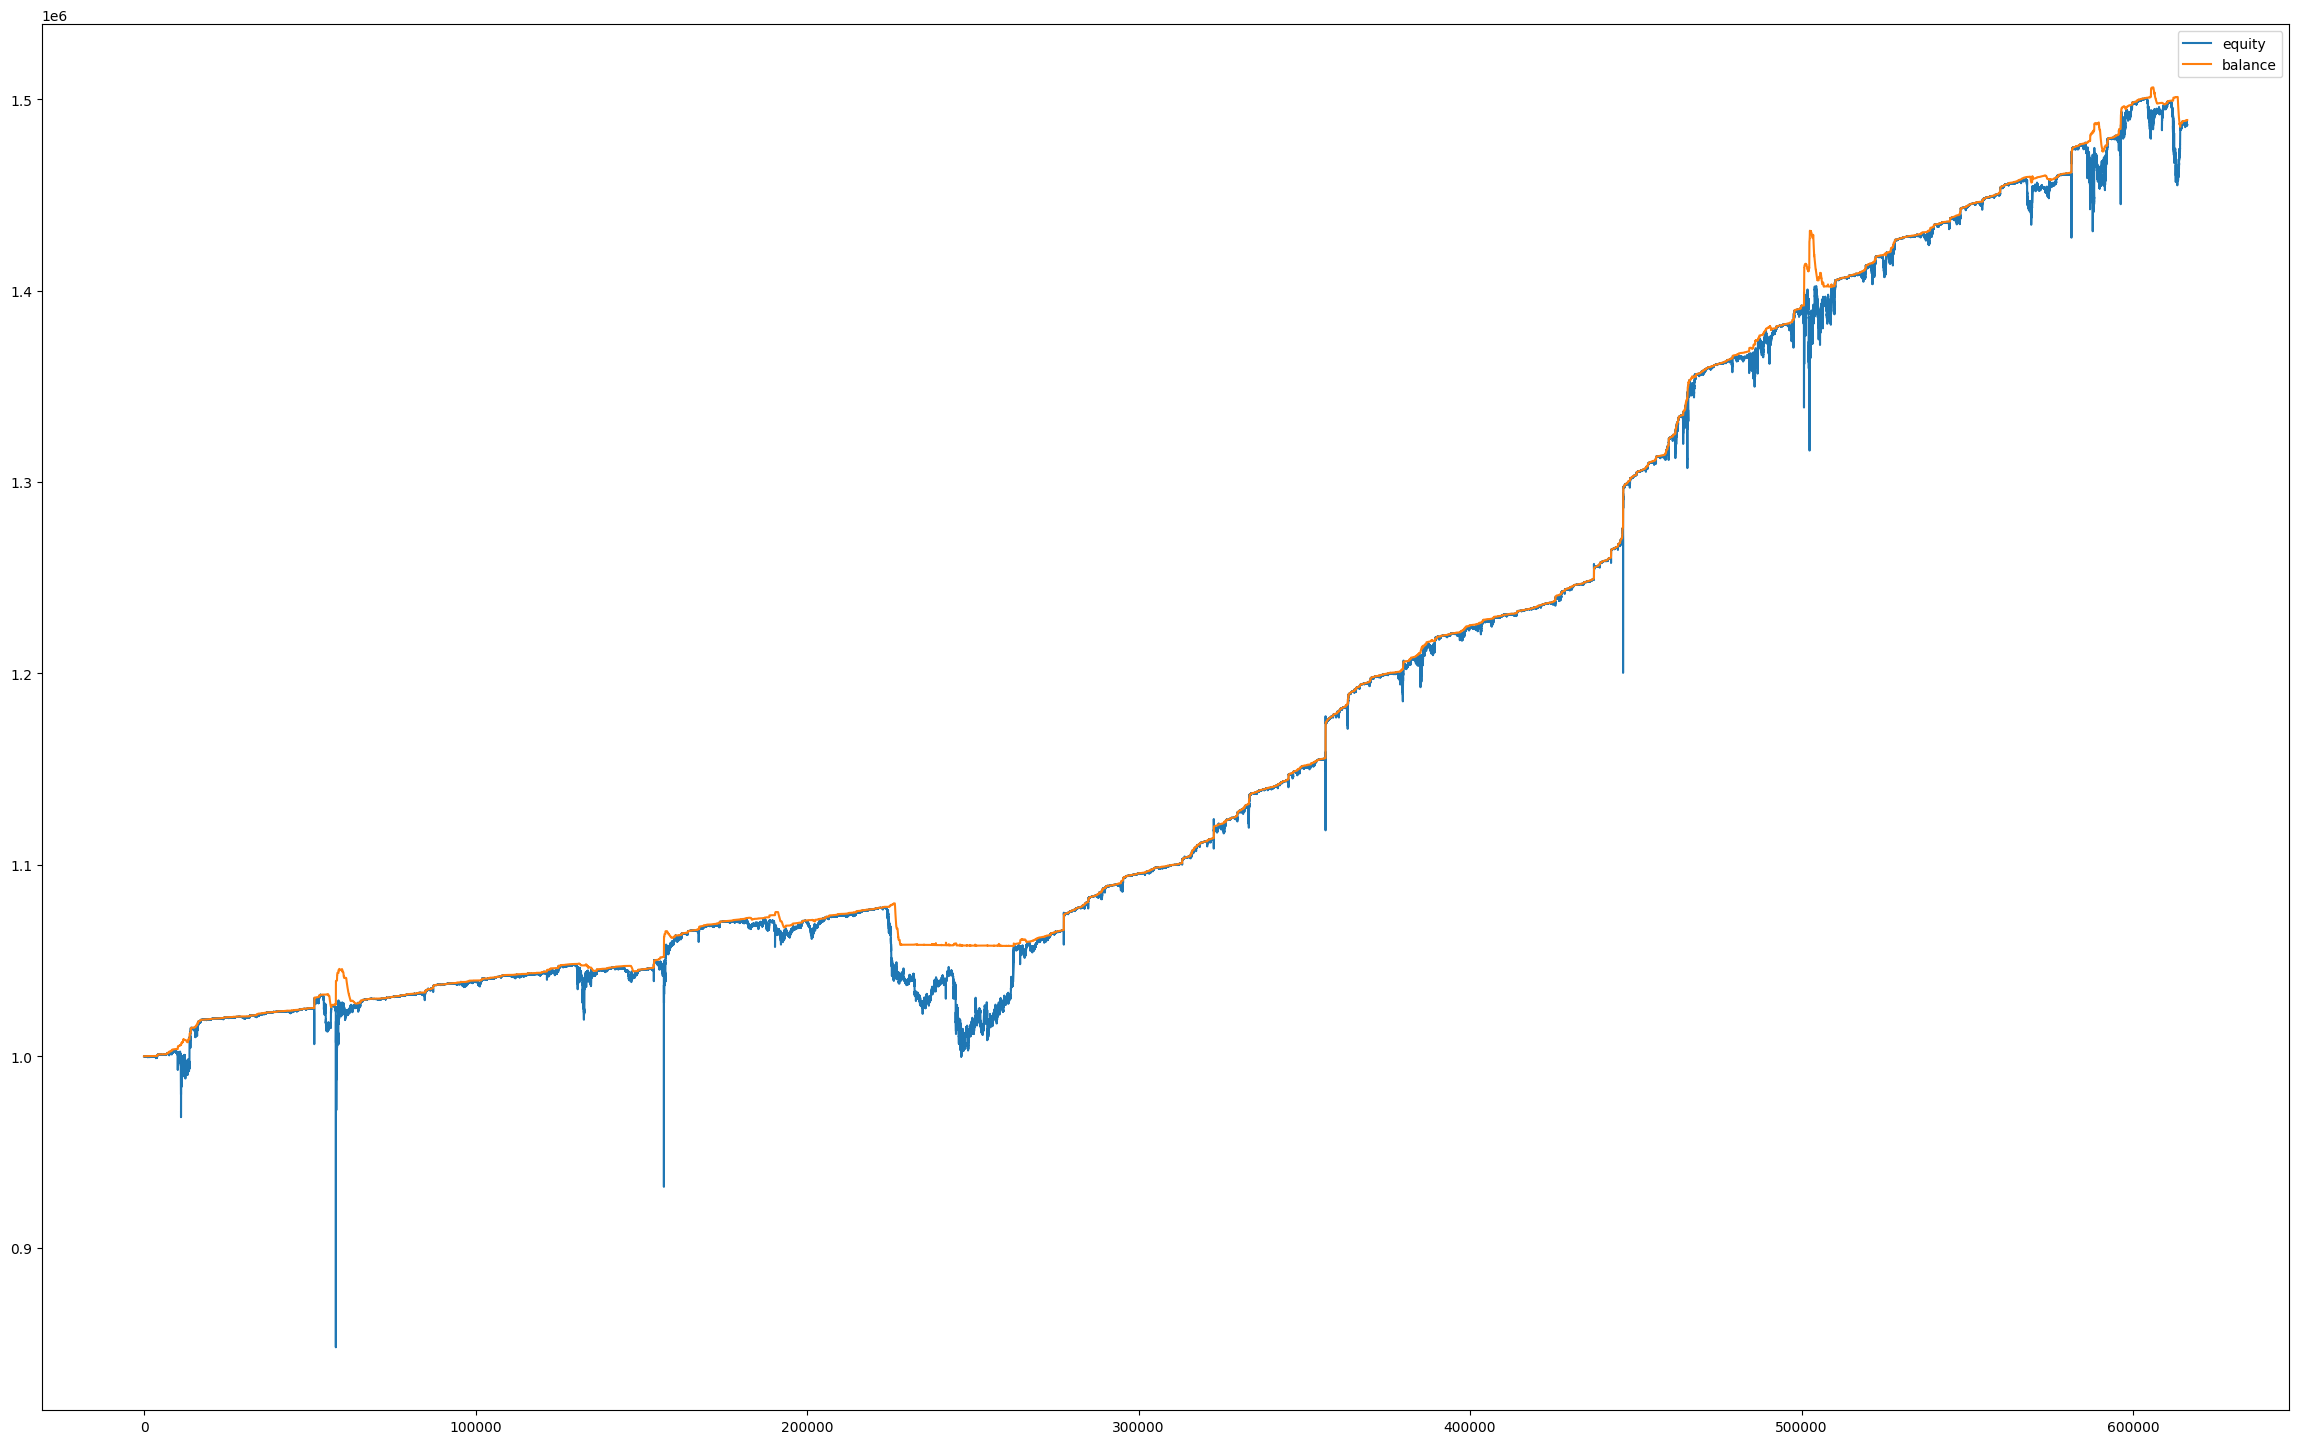

In [59]:
fdf = process_forager_fills(fills)
equities = pd.Series(equities)
analysis = analyze_fills_forager(config['approved_symbols'], hlcs, fdf, equities)
balance_and_equity = fdf[["minute", "balance"]].drop_duplicates(subset="minute", keep="first")
balance_and_equity = balance_and_equity.set_index(balance_and_equity.minute.astype(int)).drop(
    ["minute"], axis=1
)
balance_and_equity = (
    pd.DataFrame(equities, columns=["equity"]).join(balance_and_equity).ffill().bfill()
)
pprint.pprint(analysis)
balance_and_equity.plot()